In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# DataFrame utilizado: German_Credit

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/camilousa/datasets/master/german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


# A continuación se realiza el proceso de analisis de todas las variables para saber cuales tienen mas correlación
# Variable a Predecir: Risk

In [3]:
fig = px.histogram(df, x="Duration", color="Risk",
                   title="Histogram of Duration by Risk Category")
fig.show()

In [4]:
fig = px.histogram(df, x="Age", color="Risk")
fig.show()

In [5]:
fig = px.histogram(df, x="Credit amount", color="Risk")
fig.show()

In [6]:
# prompt: hacer tabla de contingencia entre risk ysex y calcular que porsentaje de cada sexo está en good

# Tabla de contingencia entre Risk y Sex
contingency_table = pd.crosstab(df['Risk'], df['Sex'])
print(contingency_table)

# Porcentaje de cada sexo en good
print("resultados")
good_risk_by_sex = contingency_table.loc['good'] / contingency_table.sum(axis=0) * 100
print(good_risk_by_sex)


Sex   female  male
Risk              
bad      109   191
good     201   499
resultados
Sex
female    64.838710
male      72.318841
dtype: float64


In [7]:
# Tabla de contingencia entre Risk y Job
contingency_table = pd.crosstab(df['Risk'], df['Job'])
print(contingency_table)

# Porcentaje de cada sexo en good
print("resultados")
good_risk_by_sex = contingency_table.loc['good'] / contingency_table.sum(axis=0) * 100
print(good_risk_by_sex)


Job    0    1    2   3
Risk                  
bad    7   56  186  51
good  15  144  444  97
resultados
Job
0    68.181818
1    72.000000
2    70.476190
3    65.540541
dtype: float64


In [8]:
# Tabla de contingencia entre Risk y Housing
contingency_table = pd.crosstab(df['Risk'], df['Housing'])
print(contingency_table)

# Porcentaje de cada sexo en good
print("resultados")
good_risk_by_sex = contingency_table.loc['good'] / contingency_table.sum(axis=0) * 100
print(good_risk_by_sex)


Housing  free  own  rent
Risk                    
bad        44  186    70
good       64  527   109
resultados
Housing
free    59.259259
own     73.913043
rent    60.893855
dtype: float64


In [9]:

# Tabla de contingencia entre Risk y Saving accounts
contingency_table = pd.crosstab(df['Risk'], df['Saving accounts'])
print(contingency_table)

# Porcentaje de cada sexo en good
print("resultados")
good_risk_by_sex = contingency_table.loc['good'] / contingency_table.sum(axis=0) * 100
print(good_risk_by_sex)

Saving accounts  little  moderate  quite rich  rich
Risk                                               
bad                 217        34          11     6
good                386        69          52    42
resultados
Saving accounts
little        64.013267
moderate      66.990291
quite rich    82.539683
rich          87.500000
dtype: float64


In [10]:

# Tabla de contingencia entre Risk y Checking account
contingency_table = pd.crosstab(df['Risk'], df['Checking account'])
print(contingency_table)

# Porcentaje de cada sexo en good
print("resultados")
good_risk_by_sex = contingency_table.loc['good'] / contingency_table.sum(axis=0) * 100
print(good_risk_by_sex)

Checking account  little  moderate  rich
Risk                                    
bad                  135       105    14
good                 139       164    49
resultados
Checking account
little      50.729927
moderate    60.966543
rich        77.777778
dtype: float64


In [11]:

# Tabla de contingencia entre Risk y Purpose
contingency_table = pd.crosstab(df['Risk'], df['Purpose'])
print(contingency_table)

# Porcentaje de cada sexo en good
print("resultados")
good_risk_by_sex = contingency_table.loc['good'] / contingency_table.sum(axis=0) * 100
print(good_risk_by_sex)

Purpose  business  car  domestic appliances  education  furniture/equipment  \
Risk                                                                          
bad            34  106                    4         23                   58   
good           63  231                    8         36                  123   

Purpose  radio/TV  repairs  vacation/others  
Risk                                         
bad            62        8                5  
good          218       14                7  
resultados
Purpose
business               64.948454
car                    68.545994
domestic appliances    66.666667
education              61.016949
furniture/equipment    67.955801
radio/TV               77.857143
repairs                63.636364
vacation/others        58.333333
dtype: float64


# Las variables elegidas con más correlación fueron: Housing-Checking_account-Saving_accounts

In [12]:
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [13]:
categorical_features_onehot = ['Housing'] # Removed 'Risk' as it is the target variable
categorical_features_ordinal=['Checking account','Saving accounts']
numeric_transformer = SimpleImputer(strategy='mean')
onehot_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()
x_train=train[['Saving accounts','Checking account','Housing']]
y_train=train['Risk']
x_test=test[['Saving accounts','Checking account','Housing']]
y_test=test['Risk']
# Dropear las columnas no seleccionadas
train_dropped = train.drop(columns=[col for col in train.columns if col not in x_train.columns and col != 'Risk'])
test_dropped = test.drop(columns=[col for col in test.columns if col not in x_test.columns and col != 'Risk'])

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, categorical_features_onehot),
        ('ordinal', ordinal_transformer, categorical_features_ordinal)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaler',MinMaxScaler()), ('imputer',SimpleImputer(strategy='mean')),('tree', DecisionTreeClassifier(max_depth=7))]) # Added a name 'imputer' for the SimpleImputer step

# Entrenar el modelo
pipeline.fit(x_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')


Precisión del modelo: 0.715


In [14]:
result = cross_validate(pipeline,
                        train[['Saving accounts','Checking account','Housing']], train['Risk'], cv=5,
                        return_train_score=True)

In [15]:
print(result['train_score'].mean(), result['train_score'].std())
print(result['test_score'].mean(), result['test_score'].std())

0.7368750000000001 0.0032173844190584314
0.7 0.020539595906443737


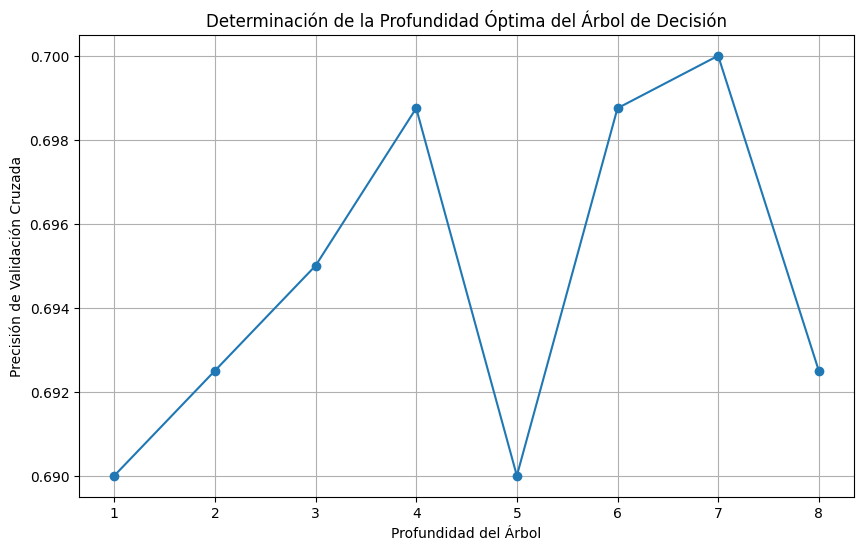

In [16]:
max_depths = np.arange(1, 9)
cv_scores = []

for depth in max_depths:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('scaler', MinMaxScaler()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('tree', DecisionTreeClassifier(max_depth=depth, random_state=42))
    ])
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths, cv_scores, marker='o')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Precisión de Validación Cruzada')
plt.title('Determinación de la Profundidad Óptima del Árbol de Decisión')
plt.grid(True)
plt.show()

# Modelo Prueba con nuevos datos

In [17]:
# Ejemplo de entrada de datos para un nuevo cliente
new_client_data = {
    'Nombre': 'Juan',
    'Edad': 30,
    'Salario': 50000,
    'Saving accounts': 'little',
    'Checking account': 'little',
    'Housing': 'own'
}

# Convertir el diccionario a un DataFrame de Pandas
new_client_df = pd.DataFrame([new_client_data])

# Realizar la predicción
prediction = pipeline.predict(new_client_df)

# Imprimir el resultado
if prediction[0] == 'good':
    print("El modelo predice que el cliente tiene un buen riesgo crediticio.")
else:
    print("El modelo predice que el cliente tiene un mal riesgo crediticio.")


El modelo predice que el cliente tiene un buen riesgo crediticio.


In [18]:
new_client_df

,Nombre,Edad,Salario,Saving accounts,Checking account,Housing
0,Juan,30,50000,little,little,own
